Sentiment Analysis Tutorial

Source: https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
Dataset: https://www.kaggle.com/datasets/kazanova/sentiment140	

Getting started ---
You will need to install some libraries. There are two options to install:
(1) in jupyter notebook: type '!pip install {LIBRARY_NAME}' in one of the cells. 
(2) in the command line: navigate to the directory you would like the library to be installed to, and type 'pip install {LIBRARY NAME}'.

If you're still running into issues, follow the instructions of the error message or you can google '{library name} python' to find what you need to install.  

PART I - GENEREATING WORD CLOUDS.

In [ ]:
'''
# a few libraries you'll need to install. 
pip install nltk
pip install wordcloud
pip install seaborn
pip install scikit-learn
'''

Import Necessary Libraries

In [4]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

Download the dataset, save into the same directory as this project, and rename to "Project_Data.csv".

In [5]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('Project_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
347804,0,2016566704,Wed Jun 03 07:00:02 PDT 2009,NO_QUERY,trustforlust,i made nur cry twice today! sorry!!!! but i kn...
713750,0,2258921924,Sat Jun 20 16:43:12 PDT 2009,NO_QUERY,hkremer,@db there was a problem w/ your twitpic
571327,0,2208754019,Wed Jun 17 09:35:15 PDT 2009,NO_QUERY,2liveLea,My aunt just put crackers in my Steven Sprouse
620592,0,2228457720,Thu Jun 18 14:27:56 PDT 2009,NO_QUERY,widget53,"Feeling glad I'm not working tomorrow, but sa..."
914466,4,1752873098,Sat May 09 23:16:58 PDT 2009,NO_QUERY,MissCrys_,losing weight check the pic


In [6]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [7]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df. shape

(1048576, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [10]:
np.sum(df.isnull().any(axis=1))

0

In [11]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [9]:
np.sum(df.isnull().any(axis=1))

0

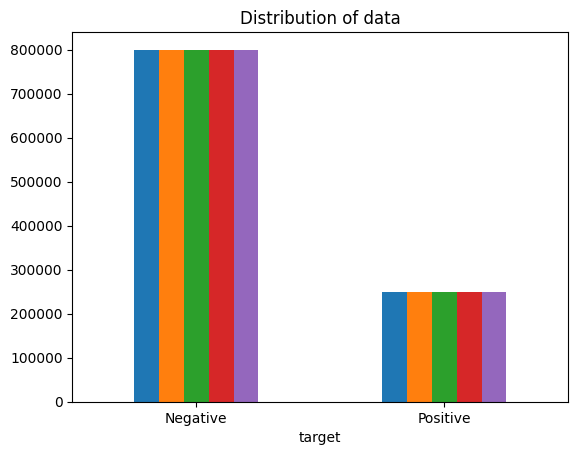

In [8]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

C:\Users\akuan\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akuan\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\akuan\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='target', ylabel='count'>

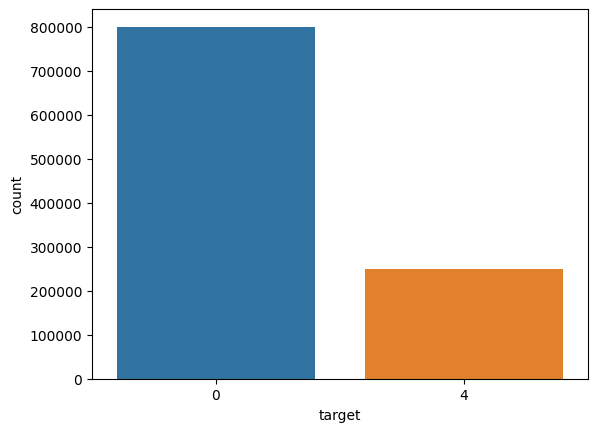

In [12]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [13]:
data=df[['text', 'target']]

In [14]:
df = data.loc[data['target']==data['target'].replace(4,1)]
df

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
799995,Sick Spending my day laying in bed listening ...,0
799996,Gmail is down?,0
799997,rest in peace Farrah! So sad,0
799998,@Eric_Urbane Sounds like a rival is flagging y...,0


In [15]:
data['target'].unique()

array([0, 4], dtype=int64)

In [16]:
# 5.4: Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [17]:
# Taking one-fourth of the data so we can run it on our machine easily
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [18]:
dataset = pd.concat([data_pos, data_neg])

In [19]:
# 5.7 Making statement text in lowercase
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [20]:
# define set containing stopwards (insignificant to natural language data)
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

NOTE: output will NOT match tutorial for steps 5.14 - 5.17, as we have reduced the dataset to 20,000 elements in step 5.5

In [21]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].tail()

19995    not much time off weekend, work trip malmï¿½ f...
19996                                     one day holidays
19997                   feeling right .. hate damn humprey
19998    geez,i hv read whole book personality types em...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [37]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [38]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [39]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [40]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

Tokenization is an essential part of natural language processing. It is splitting a "sentence" into smaller components, which will be words in our context. To learn more, you can read: https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/#:~:text=Tokens%20are%20the%20building%20blocks,n%2Dgram%20characters)%20tokenization.

The code for step 5.14 in the tutorial causes errors, so you can use the following code instead:

In [22]:
# DIFFERENT CODE: step 5.14!
import nltk
from nltk.tokenize import word_tokenize
dataset['text'] = dataset['text'].apply(word_tokenize)
dataset['text'].head()

0    [@, switchfoot, http, :, //twitpic.com/2y1zl, ...
1    [upset, ca, n't, update, facebook, texting, it...
2    [@, kenichan, dived, many, times, ball, ., man...
3              [whole, body, feels, itchy, like, fire]
4    [@, nationwideclass, no, ,, it, 's, not, behav...
Name: text, dtype: object

In [23]:
dataset['text'].head()

0    [@, switchfoot, http, :, //twitpic.com/2y1zl, ...
1    [upset, ca, n't, update, facebook, texting, it...
2    [@, kenichan, dived, many, times, ball, ., man...
3              [whole, body, feels, itchy, like, fire]
4    [@, nationwideclass, no, ,, it, 's, not, behav...
Name: text, dtype: object

In [73]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text']

0        [switchfoot, httptwitpiccomzl, a, s, bummer, s...
1        [upset, cant, update, facebook, texting, it, m...
2        [kenichan, dived, many, times, ball, managed, ...
3                  [whole, body, feels, itchy, like, fire]
4        [nationwideclass, no, its, not, behaving, all,...
                               ...                        
19995    [not, much, time, off, weekend, work, trip, ma...
19996                                 [one, day, holidays]
19997                [feeling, right, hate, damn, humprey]
19998    [geezi, hv, read, whole, book, personality, ty...
19999    [threw, sign, donnie, bent, over, get, but, th...
Name: text, Length: 20000, dtype: object

In [81]:
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akuan\AppData\Roaming\nltk_data...


0    [switchfoot, httptwitpiccomzl, a, s, bummer, s...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, its, not, behaving, all,...
Name: text, dtype: object

In [24]:
X=data.text
y=data.target


Negative Tweet Word Cloud


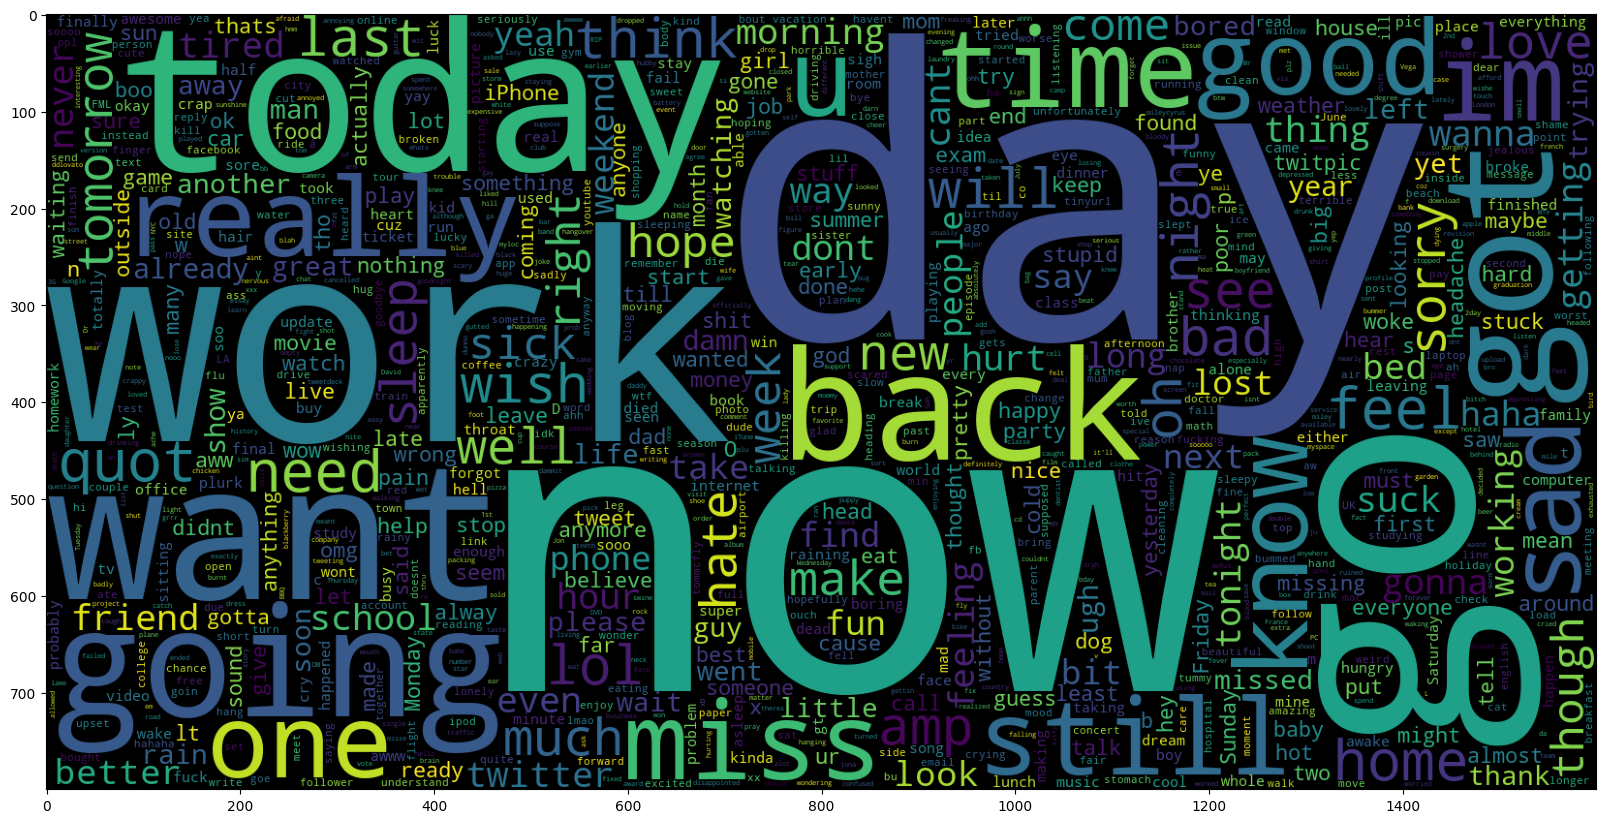

In [25]:
print('Negative Tweet Word Cloud')
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

Positive Tweet Word Cloud


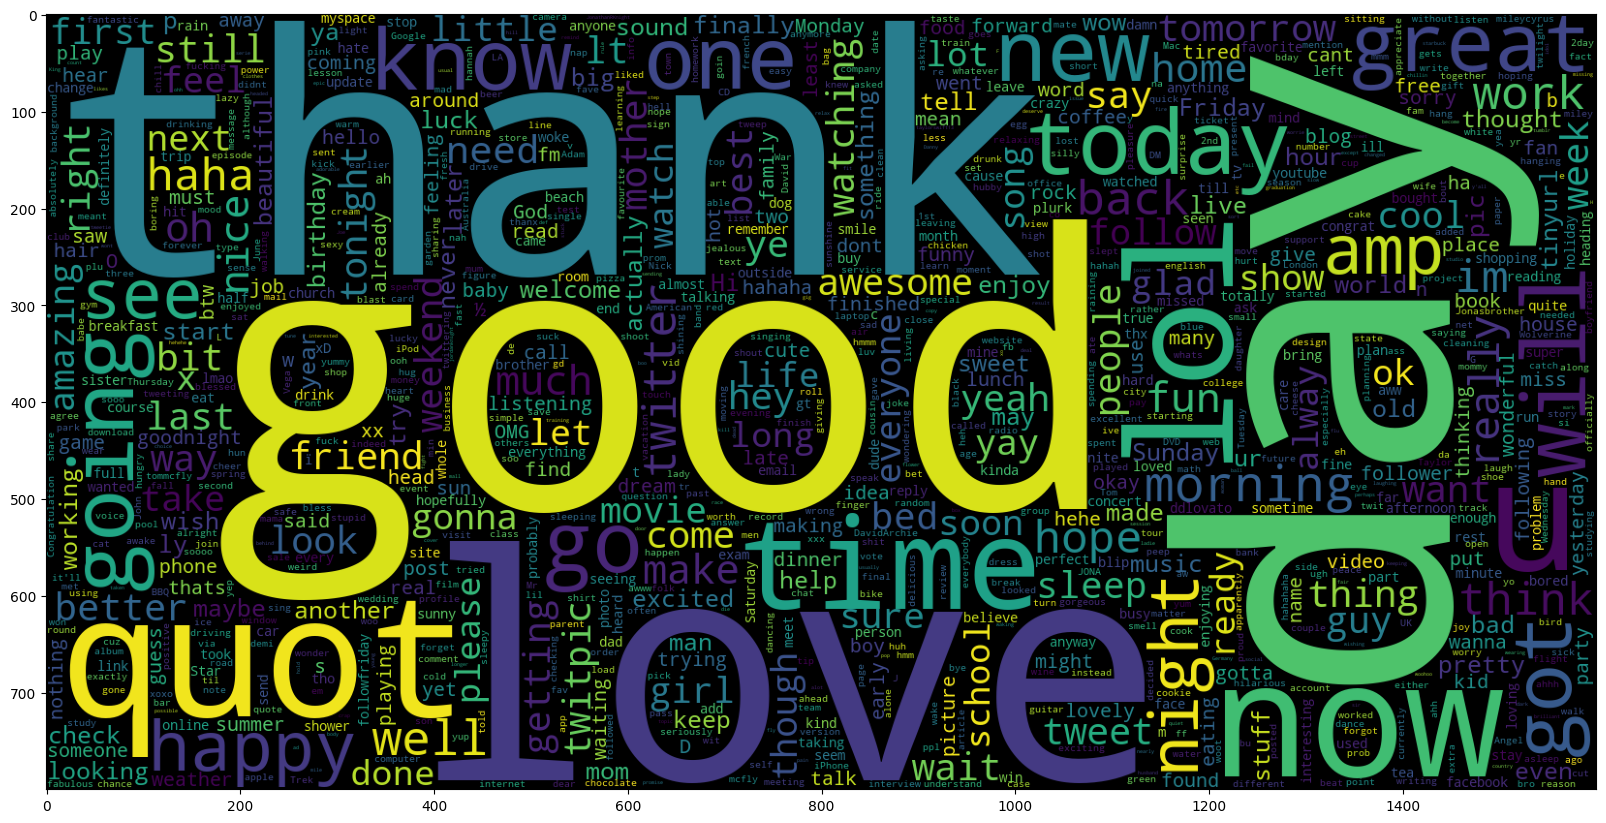

In [26]:
print('Positive Tweet Word Cloud')
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

PART II - Machine Learning - Training Data and Building Models

In [28]:
# Separating the 95% data for training data and 5% for testing data
from sklearn.model_selection import train_test_split

# Use data from step 5.17 to do the training. NOTE: you may need to run all the cells before if you get an error 
# message, as the state of the data may be wiped out when you close the notebook
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

Perform vectorization based on frequency of terms appearing, TF IDF.
Read more at: https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [30]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

Background for Model evaluation: 

Confusion Matrix: table which shows 


. Suppose we had a classification dataset with 1000 data points.

In [31]:
# Step 8: model evaluation 
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     40097
           4       0.67      0.66      0.66     12332

    accuracy                           0.84     52429
   macro avg       0.78      0.78      0.78     52429
weighted avg       0.84      0.84      0.84     52429



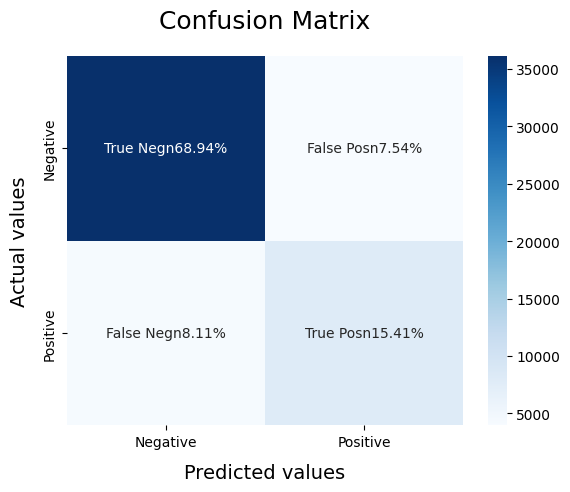

In [32]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

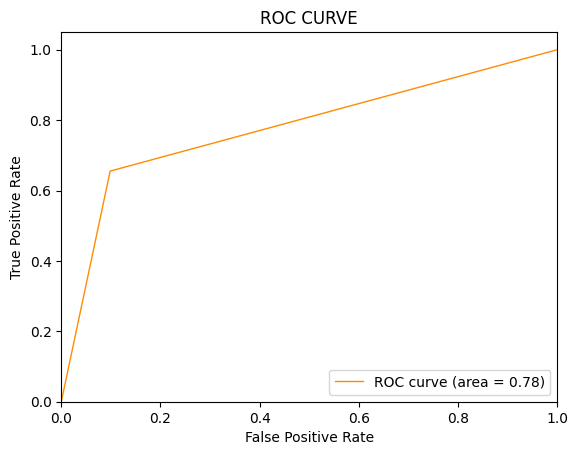

In [56]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred1, pos_label=4) # pos_label is based on y_test,  upper limit is 4.
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

C:\Users\akuan\miniconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.93      0.91     40097
           4       0.74      0.63      0.68     12332

    accuracy                           0.86     52429
   macro avg       0.81      0.78      0.80     52429
weighted avg       0.86      0.86      0.86     52429



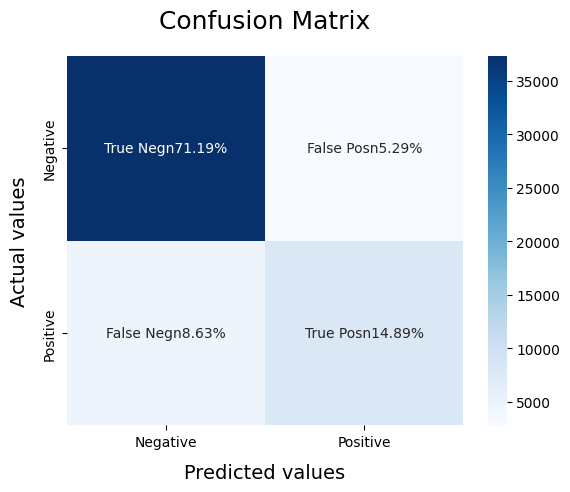

In [58]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

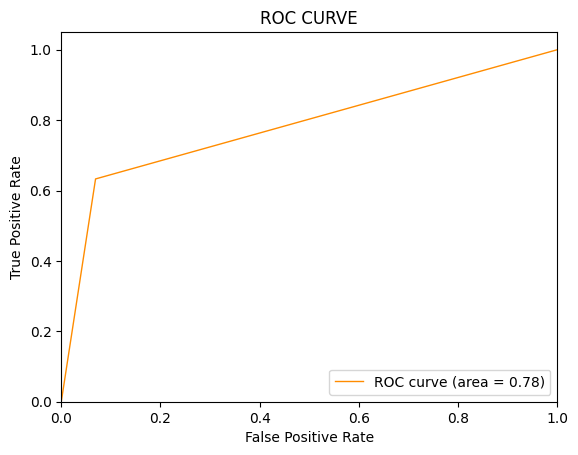

In [63]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2, pos_label=4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()